# Projeto 1 - Ciência dos Dados

## Nome: Gabriela Moreno Boriero


## Perguntas a serem respondidas

1- Desde que o Uruguai entrou no Mercosul houve aumento nas exportações? 

2- Qual a relação das exportações do Uruguay desde a entrada no Mercosul com os outros países do bloco?

3- Qual a relação das exportações do Uruguay desde a entrada no Mercosul com o resto do mundo?


4- Qual a relação das exportações do Uruguay desde a entrada no Mercosul com um paíse similar ao Uruguai?

## Explicação da hipótese e mecanismo

O Mercosul é um bloco economico formado por Uruguai, Argentina, Brasil e Paraguai. Este tem como objetivo integrar os países tanto economicamente quanto aos habitantes.Assim, por meio da tarifa externa comum (TEC) os países do bloco possuem mais competetitividade, dessa forma possibilitando um aumento no numero de exportações. 
https://www.significados.com.br/mercosul/


## Bases de dados usadas

https://www.gapminder.org/data/

Variaveis:
* Exports(/% of GDP)
* PIB


# Separando os dados

### Import

In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import math as math
from scipy import stats
import matplotlib.pyplot as plt

### Leitura dos arquivos 

In [2]:
exportacao = pd.read_excel('exports_percent_of_gdp.xlsx')
pib = pd.read_excel('gdp_total_yearly_growth.xlsx')

### Mudança de índices

In [3]:
exportacao_indice = exportacao.set_index("country")
pib_indice = exportacao.set_index("country")

## Dados Uruguai Exportação 


In [4]:
exportacao_Uruguay = exportacao_indice.loc['Uruguay',:]

### Separando dados em Antes e Depois da entrada do Uruguay no Mercosul

#### Antes da entrada no MERCOSUL

O Mercosul foi criado no ano de 1991, assim a seguir foram separados os dados entre o ano de 1960 e 1990. Desta forma, posteriormente será possivel comparar com o demais parâmetros.

In [5]:
antes=exportacao_Uruguay.transpose()
uruguay_anterior=antes[(antes.index>1960) & (antes.index<1990)]

O gráfico acima mostra a os dados da exportação ao decorrer dos anos, antes da entrada no país no MERCOSUL.

A partir do código a seguir é possivel obter a média dos valores das exportações do Uruguai antes da entrada no MERCOSUL.

In [6]:
média_uruguay_antes=uruguay_anterior.mean()
média_uruguay_antes

172.89655172413794

#### Depois da entrada no MERCOSUL

O código a seguir é a respeito das exportações do país apartir do ano de 1991.

In [7]:
depois=exportacao_Uruguay.transpose()
uruguay_depois=depois[(depois.index>1990)]

In [8]:
média_uruguay_depois=uruguay_depois.mean()
média_uruguay_depois

229.40740740740742

A cima é possivel observar a mesma analise realizada anteriormente, porém dessa vez com dados após a entrada do país no MERCOSUL. 
Ambos os dados serão utilizados para comparação futuramente. 

## Separar os valores de Exportação dos países do MERCOSUL


Tabela: Paises Mercosul X Anos

In [9]:
paises_no_mercosul=exportacao_indice.transpose()
MERCOSUL_1990 = paises_no_mercosul[(paises_no_mercosul.index>1990)]
exportacao_paises_Mercosul = MERCOSUL_1990.loc[:,["Uruguay","Argentina","Brazil","Paraguay"]]

Calculando média de exportaçao dos paises pertencentes ao bloco desde a criação do bloco (1991)

In [10]:
exportacao_paises_Mercosul_transposta=exportacao_paises_Mercosul.transpose()
média_paises_mercosul_ano=exportacao_paises_Mercosul_transposta.describe()
média_paises_mercosul= média_paises_mercosul_ano.loc["mean",:]
média_total_países_mercosul=média_paises_mercosul.mean()
média_total_países_mercosul

76.92601851851852

Criando Coluna na tabela com os valores médios dos paises do bloco por ano.

In [11]:
exportacao_paises_Mercosul['Média'] = média_paises_mercosul
#exportacao_paises_Mercosul

## Valores de exportação de outros países do Mundo


Criando tabela com valores de exportação dos outros países do mundo a partir de 1991.

In [12]:
exportacao_invertida=exportacao_indice.transpose()
exportacao_outros_paises=exportacao_invertida.drop(columns=["Uruguay","Argentina","Brazil","Paraguay"])
tabela_outros_paises=exportacao_outros_paises.transpose()
tabela_outros_paises_depois_91=tabela_outros_paises.drop(columns =[1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972,
       1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984,
       1985, 1986, 1987, 1988, 1989, 1990])
#tabela_outros_paises_depois_91

Obtendo a média total de todos os países a partir do ano de 1991.

In [13]:
medias_outros_paises_p_ano =tabela_outros_paises_depois_91.describe()
média_outros_paises=medias_outros_paises_p_ano.loc["mean",:]
média_total_outros_paises=média_outros_paises.mean()
média_total_outros_paises

111.5846946678057

## Encontrando um país similar ao Uruguai

Com objetivo de obter um país que fosse possivel comparar com o Uruguai foi usado os dados de PIB, para encontrar o país que possui uma maior compatibilidade.

Para iniciar foi obtida a média do pib de cada pais, para posteriormente comparar com o pib do Uruguai. Como é possivel observar a seguir

In [14]:
pib_trasposta=pib_indice.transpose()
paises_menos_uruguay=pib_trasposta.drop(columns="Uruguay")
medias_pib_paises =paises_menos_uruguay.describe()
MED=medias_pib_paises.transpose()
média_paises=MED.loc[:,"mean"]
MPI= média_paises.reset_index()
#MPI

Posteriormente foi obtido o valor do PIB médio do uruguai para comparar com os obtidos anteriormente. 

In [74]:
pib_uruguay = pib_trasposta.loc[:,'Uruguay']
PUI=pib_uruguay.reset_index()
analise_PIB_uruguay=PUI.Uruguay.describe()
APUI=analise_PIB_uruguay.reset_index()
Média= APUI.loc[1,'Uruguay']
#Média


Para comparar os valores médios dos países com o do uruguai foi realizado o código abaixo:

In [16]:
mais_menos= 190.672414<Média<200.672414
for i in range(len(MPI['mean'])):
    if MPI['mean'][i]<=215 and MPI['mean'][i]>=175:
        print("País:",MPI['country'][i])
        print()
        print("Média PIB:",MPI['mean'][i])
        print()
        print("Indice:",i)
        print()
        print()

País: Tanzania

Média PIB: 175.2962962962963

Indice: 164


País: Tonga

Média PIB: 212.4547619047619

Indice: 168




A equação a seguir ira evidenciar qual dos países possui uma diferença menor do valor do Uruguai.

In [17]:
def diferenca_entre_PIB(pais, Uruguay):
    if pais>Uruguay:
        D=pais-Uruguay
    else:
        D=Uruguay-pais
    return D

print("País que está com PIB mais próximo do Uruguay?")
print()
print("Tanzania:")
print(diferenca_entre_PIB(MPI['mean'][164],Média))
print()
print()
print("Tonga:")
print(diferenca_entre_PIB(MPI['mean'][168],Média))

País que está com PIB mais próximo do Uruguay?

Tanzania:
24.376117496807154


Tonga:
12.78234811165845


Tendo em vista que Tonga possui uma diferença menor da média do pib do uruguay, será o país que também será analisado.

## Valores da exportação de Tonga

Separando os valores de exportação de Tonga a partir do ano de 1991.

In [18]:
exportacao_Tonga = exportacao_indice.loc['Tonga',:]
depois=exportacao_Tonga.transpose()
Tonga_depois=depois[(depois.index>1990)]
Tonga_depois

1991    229.0
1992    236.0
1993    199.0
1994    174.0
1995    175.0
1996    204.0
1997     21.1
1998    199.0
1999    156.0
2000    144.0
2001    130.0
2002    183.0
2003    194.0
2004    197.0
2005    178.0
2006    145.0
2007    122.0
2008    157.0
2009    134.0
2010    124.0
2011    159.0
2012    170.0
2013    204.0
2014    168.0
2015    170.0
2016    213.0
2017      NaN
Name: Tonga, dtype: float64

Média dos valores de exportação de Tonga no decorrer dos anos (a partir de 1991)

In [19]:
Exportacao_Tonga=Tonga_depois.mean()
TDI= Tonga_depois.reset_index()
Exportacao_Tonga

168.65769230769232

# Analisando os dados

In [20]:
uai = uruguay_anterior.reset_index()
udi= uruguay_depois.reset_index()
eom = média_paises_mercosul.reset_index()
mop= média_outros_paises.reset_index()

### Comparando Antes e Depois da entrada no Mercosul

In [21]:
data = {
'Época': ['Antes', 'Depois'],
'Média': [média_uruguay_antes,média_uruguay_depois],
}
tabela_media_uruguay = pd.DataFrame(data, columns=['Época', 'Média'])


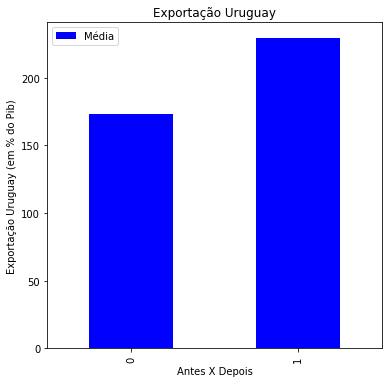

In [22]:
plot = tabela_media_uruguay.plot(kind='bar',title='Exportação Uruguay',figsize=(6, 6),color=('b','g'))
plt.ylabel('Exportação Uruguay (em % do Pib)')
plt.xlabel('Antes X Depois')
plt.show()

A partir do gráfico acima já é possivel observar que a média depois da entrada do país no Mercosul foi maior.

In [23]:
def reta(dados_x, dados_y, c, ajuste, linear, angular):    
    a = dados_y.cov(dados_x) / dados_x.var()
    b = dados_y.mean() - a*dados_x.mean()

    print(ajuste)
    print()
    print(linear, b)
    print()
    print(angular, a)
    print()
    print()
    plt.scatter(dados_x, dados_y, c=c, alpha=0.8)
    plt.title('Retas Uruguay antes e depois da entrada no Mercosul')
    plt.xlabel('Anos')
    plt.ylabel('exportação(% do Pib)')

    plt.plot((dados_x.min(), dados_x.max()), (a*dados_x.min()+b, a*dados_x.max()+b), color=c)

    plt.tight_layout()


Ajuste linear Uruguay Antes:

Coeficiente linear: -8308.90147783251

Coeficiente angular: 4.294581280788177


Ajuste linear Uurugay Depois

Coeficiente linear: -5671.259259259258

Coeficiente angular: 2.944444444444444




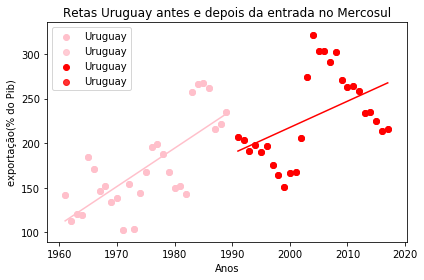

In [24]:
uai = uruguay_anterior.reset_index()
udi= uruguay_depois.reset_index()
plt.scatter(uai["index"], uai.Uruguay, color="pink")
reta(uai["index"], uai.Uruguay, "pink","Ajuste linear Uruguay Antes:", "Coeficiente linear:", "Coeficiente angular:")
plt.scatter(udi["index"], udi.Uruguay, color="r")
reta(udi["index"], udi.Uruguay, "r", "Ajuste linear Uurugay Depois", "Coeficiente linear:", "Coeficiente angular:")
plt.legend()

A partir do gráfico acima é possivel observar que o coeficiente angular da reta dos dados antes da entrada no mercosul é aproximadamente 1,5 vezes maior que a reta depois da entrada no MERCOSUL.

### Comparando Dados de exportação:
### Uruguai Depois da entrada no Mercosul X Países do Mercosul X Outros países X Tonga

In [25]:
data = {
'País/Organização': ['Uruguay', 'Mercosul','Outros países', 'Tonga'],
'Média': [média_uruguay_depois,média_total_países_mercosul, média_total_outros_paises, Exportacao_Tonga ],
}
tabela_media_uruguayXmercosulXoutros_paisesXtonga = pd.DataFrame(data, columns=['País/Organização', 'Média'])

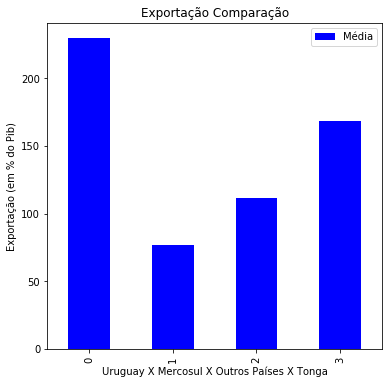

In [26]:
plot = tabela_media_uruguayXmercosulXoutros_paisesXtonga.plot(kind='bar',title='Exportação Comparação',figsize=(6, 6),color=('b','r','g','pink'))
plt.ylabel('Exportação (em % do Pib)')
plt.xlabel('Uruguay X Mercosul X Outros Países X Tonga')
plt.show()

A partir do gráfico acima é possivel observar que a média do uruguai é a mais depois, posteriormente Tonga, outros países e mercosul, respectivamente. 

In [27]:
def reta(dados_x, dados_y, c, ajuste, linear, angular):    
    a = dados_y.cov(dados_x) / dados_x.var()
    b = dados_y.mean() - a*dados_x.mean()

    print(ajuste)
    print()
    print(linear, b)
    print()
    print(angular, a)
    print()
    
    plt.scatter(dados_x, dados_y, c=c, alpha=0.8)
    plt.title('Comparação entre Uruguay X Mercosul X Outros Paises X Tonga')
    plt.xlabel('Anos')
    plt.ylabel('exportação(% do Pib)')

    plt.plot((dados_x.min(), dados_x.max()), (a*dados_x.min()+b, a*dados_x.max()+b), color=c)

    plt.tight_layout()


Ajuste linear entre Uruguay:

Coeficiente linear: -5671.259259259258

Coeficiente angular: 2.944444444444444

Ajuste linear entre Mercosul:

Coeficiente linear: -1469.4419851444848

Coeficiente angular: 0.7716407203907202

Ajuste linear entre Outros Países:

Coeficiente linear: -808.8823949942777

Coeficiente angular: 0.4593149150010396

Ajuste linear entre Tonga:

Coeficiente linear: 1579.919025641026

Coeficiente angular: -0.7042222222222224



C:\Users\Gabi_XPS\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


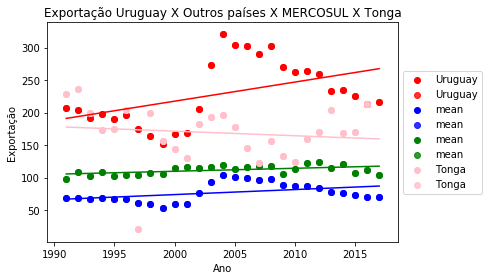

In [28]:
plt.scatter(udi["index"], udi.Uruguay, color="r")
reta(udi["index"], udi.Uruguay, "r", "Ajuste linear entre Uruguay:", "Coeficiente linear:", "Coeficiente angular:")

plt.scatter(eom["index"] ,eom ["mean"] , color="b")
reta(eom["index"] ,eom ["mean"],"b", "Ajuste linear entre Mercosul:", "Coeficiente linear:", "Coeficiente angular:")

plt.scatter(mop["index"] ,mop["mean"], color="g")
reta(mop["index"] ,mop["mean"], "g", "Ajuste linear entre Outros Países:", "Coeficiente linear:", "Coeficiente angular:")

plt.scatter(TDI["index"] ,TDI["Tonga"], color="pink")
reta(TDI["index"] ,TDI["Tonga"],"pink", "Ajuste linear entre Tonga:", "Coeficiente linear:", "Coeficiente angular:")

ax = plt.subplot(111)
plt.title('Exportação Uruguay X Outros países X MERCOSUL X Tonga')
plt.xlabel('Ano')
plt.ylabel('Exportação')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


A partir do gráfico acima que o coeficiente angular da reta de dados do Uruguai é maior que a do Mercosul, que é seguida pela dos outros países do mundo. Por último há Tongo, o qual possui um coeficiente angular negativo o que mostra uma queda nas exportações do país.

In [95]:
pib_uruguay_depois=pib_uruguay[(pib_uruguay.index>1990)]
PID=pib_uruguay_depois.reset_index()
PID_index= PID.set_index("index")

uruguay_depois=depois[(depois.index>1990)]
UD=uruguay_depois.reset_index()
UD_index= UD.set_index("index")
UD_index.columns=["Uruguay"]

df = PID_index.join(UD_index, how='inner', lsuffix='Pib ', rsuffix='exportação ')

# Analise

## Desde que o Uruguai entrou no Mercosul houve aumento nas exportações? 

A partir dos dados é possivel concluir que a média de exportações antes da entrada do Uruguai no bloco foi menor que a media posterior a entrada ao bloco. Porem, o coeficiente angular mostra que as exportações a partir do ano de 1991 estão mais constantes (possui um coeficiente angular menor) do que as exportações realizadas antes da entrada no bloco.

## Qual a relação das exportações do Uruguay desde a entrada no Mercosul com os outros países do bloco?

A partir dos gráfico de barras é posssivel observar que a média de exportação do Uruguai foi superior a dos países do mercosul. Além disso, o uruguay tem um coeficente angular quase 4 vezes maior que o do Mercosul. O que evidencia um maior aumento nas exportações do Uruguay quando relacionado ao mercosul.

## Qual a relação das exportações do Uruguay desde a entrada no Mercosul com o resto do mundo?

Os dados mostraram que a média de exportações do Uruguai também supera a média dos países fora do bloco. Além de também possuir um coeficiente angular maior.


Segundo o site el país "na última década, o comércio entre os sócios do Mercosul diminuiu, as negociações com a União Europeia, Estados Unidos e China fracassaram e o crescimento da região é menor do que no resto da América Latina."
https://brasil.elpais.com/brasil/2016/12/23/economia/1482447953_714254.html

## Qual a relação das exportações do Uruguay desde a entrada no Mercosul com um paíse similar ao Uruguai?

Apesar que Tonga possuir um PIB proximo do Uruguay,a partir das análises realizadas é possível observar que a média de Tonga foi maior que a do Mercosul e dos países fora do bloco, porem ainda foi inferior a média de exportações do Uruguai. 
Além disso, Tonga apresenta ter um coeficiente angular negativo o que mostra um decrescimo nas exportações.

# Conclusão

A partir da análise realizada é possivel observar que o Uruguai possui tanto uma média, quanto um coeficiente angular na reta dos dados maior que os países do MERCOSUL, os países não pertecentes ao bloco e ao Tonga. 
Porém, os dados mostram que antes de entrar no bloco o pais possuia uma média inferior, porém um coeficiente angular maior. Assim, é possivel obsersar que há uma maior mudança nas exportações antes da entrada no bloco.

Desta forma, é possivel concluir que o Uruguai possui uma crescente representatividade das exportações no seu PIB, o que supera a média dos demais países do bloco, além dos países não pertencentes ao bloco e país semelhante (Tonga).